IMPORTING REQUIRED LIBRARIES

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

GETTING DATASET

In [48]:
df = pd.read_csv('/Users/madhavvaranasi/Downloads/crp.csv')
print(df)

     Year       City  Population (in Lakhs) (2011)+  Murder  Kidnapping  \
0    2014  Ahmedabad                           63.5      82         367   
1    2015  Ahmedabad                           63.5      94         332   
2    2016  Ahmedabad                           63.5     103         376   
3    2017  Ahmedabad                           63.5      90         263   
4    2018  Ahmedabad                           63.5      98         277   
..    ...        ...                            ...     ...         ...   
147  2017      Surat                           45.8      89         332   
148  2018      Surat                           45.8     108         373   
149  2019      Surat                           45.8      97         358   
150  2020      Surat                           45.8     116         163   
151  2021      Surat                           45.8     121         270   

     Crime against women  Crime against children  \
0                   1371                     43

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         152 non-null    int64  
 4   Kidnapping                     152 non-null    int64  
 5   Crime against women            152 non-null    int64  
 6   Crime against children         152 non-null    int64  
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   152 non-null    int64  
 9   Crime against SC               152 non-null    int64  
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              152 non-null    int64  
 12  Cyber Crimes                   152 non-null    int

DATASET INFORMATION

The data provides statistics on the number of crimes commited in 19 metropolitan cities during the year 2014 to 2021.
The 19 metropolitan cities are:
*  Ahmedabad        *  Bengaluru        *  Chennai   
*  Coimbatore       *  Delhi            *  Ghaziabad 
*  Hyderabad        *  Indore           *  Jaipur    
*  Kanpur           *  Kochi            *  Kolkata   
*  Kozhikode        *  Lucknow          *  Mumbai    
*  Nagpur           *  Patna            *  Pune      
*  Surat                                             
It contains the records of the 10 different category of crimes commited namely:
*  Murder                               *  Kidnapping                   
*  Crime against women                  *  Crime against children       
*  Crime Committed by Juveniles         *  Crime against Senior Citizen 
*  Crime against SC                     *  Crime against ST             
*  Economic Offences                    *  Cyber Crimes

DATA VISUALIZATION

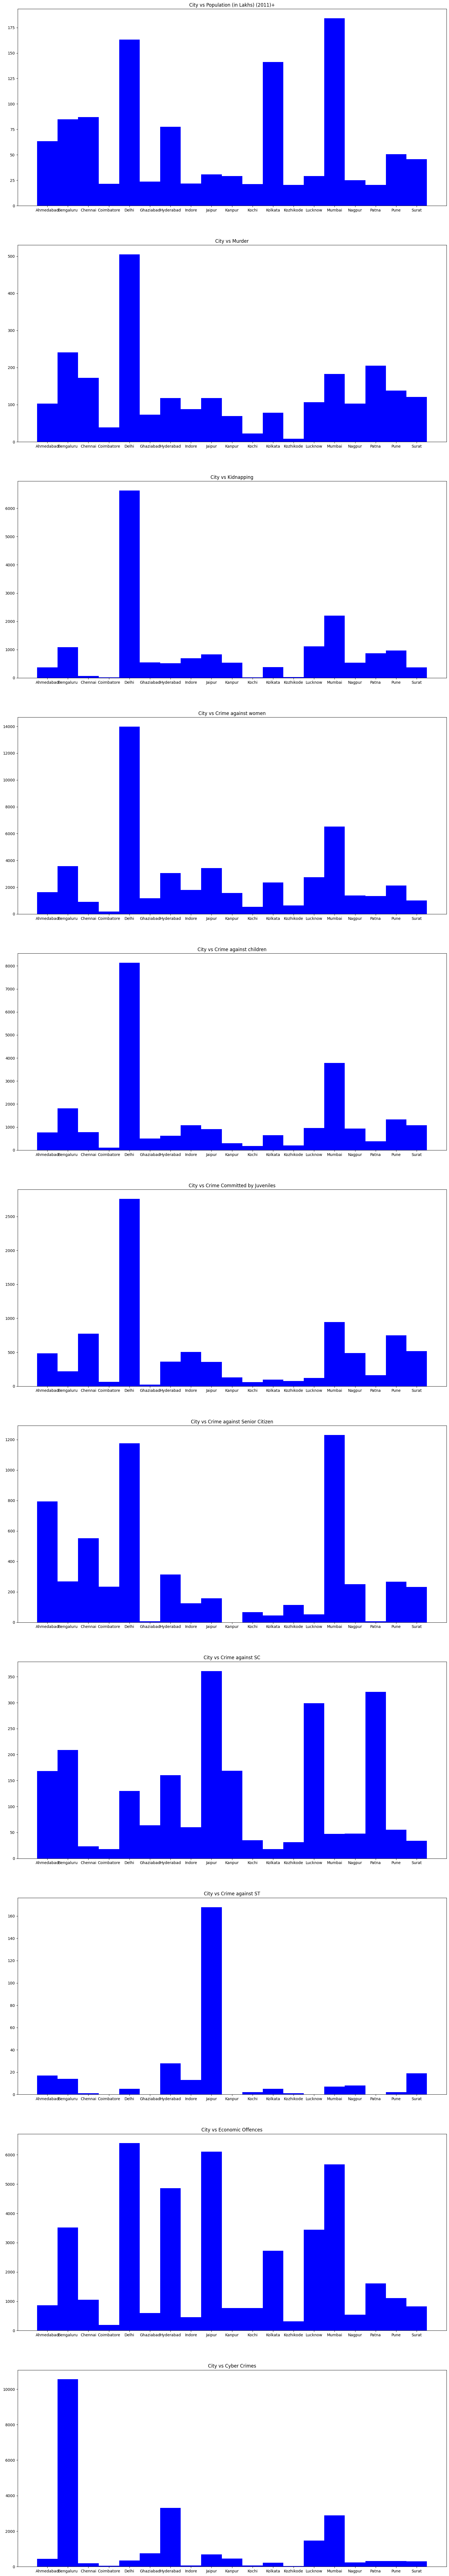

In [50]:
fig, ax = plt.subplots(11, 1, figsize=(20, 120))

for i in range(0, 11):
    ax[i].bar(df['City'], df[df.columns[i+2]], 1, color='Blue')
    ax[i].set_title('City vs ' + df.columns[i+2])
plt.show()

NEW DATAFRAME

In [51]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = df[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = df[[df.columns[i]]]
    temp['Type'] = df.columns[i]
    
    new_df = pd.concat([new_df, temp])

/var/folders/zb/9t34z8516c17lqlsy_490c_80000gn/T/ipykernel_77362/3121916961.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp])


In [52]:
print(new_df)

     Year       City  Population (in Lakhs) (2011)+ Number Of Cases  \
0    2014  Ahmedabad                           63.5              82   
1    2015  Ahmedabad                           63.5              94   
2    2016  Ahmedabad                           63.5             103   
3    2017  Ahmedabad                           63.5              90   
4    2018  Ahmedabad                           63.5              98   
..    ...        ...                            ...             ...   
147  2017      Surat                           45.8             105   
148  2018      Surat                           45.8             155   
149  2019      Surat                           45.8             228   
150  2020      Surat                           45.8             204   
151  2021      Surat                           45.8             296   

             Type  
0          Murder  
1          Murder  
2          Murder  
3          Murder  
4          Murder  
..            ...  
147  Cy

DATA PREPROCESSING

In [53]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']
print(new_df)

     Year       City  Population (in Lakhs) (2011)+ Number Of Cases  \
0    2014  Ahmedabad                           63.5              82   
1    2015  Ahmedabad                           63.5              94   
2    2016  Ahmedabad                           63.5             103   
3    2017  Ahmedabad                           63.5              90   
4    2018  Ahmedabad                           63.5              98   
..    ...        ...                            ...             ...   
147  2017      Surat                           45.8             105   
148  2018      Surat                           45.8             155   
149  2019      Surat                           45.8             228   
150  2020      Surat                           45.8             204   
151  2021      Surat                           45.8             296   

             Type Crime Rate  
0          Murder   1.291339  
1          Murder   1.480315  
2          Murder   1.622047  
3          Murder   1.4

In [54]:
new_df = new_df.drop(['Number Of Cases'], axis=1)
print(new_df)

     Year       City  Population (in Lakhs) (2011)+          Type Crime Rate
0    2014  Ahmedabad                           63.5        Murder   1.291339
1    2015  Ahmedabad                           63.5        Murder   1.480315
2    2016  Ahmedabad                           63.5        Murder   1.622047
3    2017  Ahmedabad                           63.5        Murder   1.417323
4    2018  Ahmedabad                           63.5        Murder   1.543307
..    ...        ...                            ...           ...        ...
147  2017      Surat                           45.8  Cyber Crimes   2.292576
148  2018      Surat                           45.8  Cyber Crimes   3.384279
149  2019      Surat                           45.8  Cyber Crimes   4.978166
150  2020      Surat                           45.8  Cyber Crimes   4.454148
151  2021      Surat                           45.8  Cyber Crimes   6.462882

[1520 rows x 5 columns]


In [55]:
new_df.to_csv("/Users/madhavvaranasi/Downloads/new_df.csv")

LOAD NEW DATA SET

In [56]:
new_dataset = pd.read_csv("/Users/madhavvaranasi/Downloads/new_df.csv")
print(new_dataset)

      Unnamed: 0  Year       City  Population (in Lakhs) (2011)+  \
0              0  2014  Ahmedabad                           63.5   
1              1  2015  Ahmedabad                           63.5   
2              2  2016  Ahmedabad                           63.5   
3              3  2017  Ahmedabad                           63.5   
4              4  2018  Ahmedabad                           63.5   
...          ...   ...        ...                            ...   
1515         147  2017      Surat                           45.8   
1516         148  2018      Surat                           45.8   
1517         149  2019      Surat                           45.8   
1518         150  2020      Surat                           45.8   
1519         151  2021      Surat                           45.8   

              Type  Crime Rate  
0           Murder    1.291339  
1           Murder    1.480315  
2           Murder    1.622047  
3           Murder    1.417323  
4           Murder

In [57]:
print(new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1520 non-null   int64  
 1   Year                           1520 non-null   int64  
 2   City                           1520 non-null   object 
 3   Population (in Lakhs) (2011)+  1520 non-null   float64
 4   Type                           1520 non-null   object 
 5   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 71.4+ KB
None


LABEL ENCODING

In [58]:
le = LabelEncoder()

In [59]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [60]:
file = open('/Users/madhavvaranasi/Desktop/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [61]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [62]:
file = open('/Users/madhavvaranasi/Desktop/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [63]:
print(new_dataset)

      Unnamed: 0  Year  City  Population (in Lakhs) (2011)+  Type  Crime Rate
0              0  2014     0                           63.5     9    1.291339
1              1  2015     0                           63.5     9    1.480315
2              2  2016     0                           63.5     9    1.622047
3              3  2017     0                           63.5     9    1.417323
4              4  2018     0                           63.5     9    1.543307
...          ...   ...   ...                            ...   ...         ...
1515         147  2017    18                           45.8     6    2.292576
1516         148  2018    18                           45.8     6    3.384279
1517         149  2019    18                           45.8     6    4.978166
1518         150  2020    18                           45.8     6    4.454148
1519         151  2021    18                           45.8     6    6.462882

[1520 rows x 6 columns]


SPLITTING DATA INTO TRAINING SET & TEST SET

In [64]:
x = new_dataset[new_dataset.columns[0:4]].values
print(x)

[[0.000e+00 2.014e+03 0.000e+00 6.350e+01]
 [1.000e+00 2.015e+03 0.000e+00 6.350e+01]
 [2.000e+00 2.016e+03 0.000e+00 6.350e+01]
 ...
 [1.490e+02 2.019e+03 1.800e+01 4.580e+01]
 [1.500e+02 2.020e+03 1.800e+01 4.580e+01]
 [1.510e+02 2.021e+03 1.800e+01 4.580e+01]]


In [65]:
y = new_dataset['Crime Rate'].values
print(y)

[1.29133858 1.48031496 1.62204724 ... 4.97816594 4.45414847 6.4628821 ]


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [67]:
print(x_train)

[[5.500e+01 2.021e+03 6.000e+00 7.750e+01]
 [1.900e+01 2.017e+03 2.000e+00 8.700e+01]
 [6.700e+01 2.017e+03 8.000e+00 3.070e+01]
 ...
 [1.000e+02 2.018e+03 1.200e+01 2.030e+01]
 [9.100e+01 2.017e+03 1.100e+01 1.411e+02]
 [6.200e+01 2.020e+03 7.000e+00 2.170e+01]]


In [68]:
print(x_test)

[[   5.  2019.     0.    63.5]
 [  98.  2016.    12.    20.3]
 [ 104.  2014.    13.    29. ]
 ...
 [  44.  2018.     5.    23.6]
 [  62.  2020.     7.    21.7]
 [  81.  2015.    10.    21.2]]


In [69]:
print(y_train)

[42.61935484  0.         22.31270358 ...  1.8226601   1.38908575
  0.55299539]


In [70]:
print(y_test)

[1.21417323e+01 6.99507389e+00 7.06896552e+00 8.65346535e+00
 2.45216159e+00 3.68000000e+01 4.65116279e-02 3.88000000e+00
 3.08387097e+01 4.60800000e+01 8.25806452e-01 0.00000000e+00
 6.27586207e+00 2.62711864e+00 7.62068966e+00 1.74657534e+00
 5.16129032e-01 3.00129032e+01 8.47457627e-01 6.28346457e+00
 1.46534653e+00 1.22580645e+00 1.80336773e+00 2.26789511e-01
 1.60000000e-01 1.92000000e+00 1.87192118e+00 1.14942529e-02
 3.40000000e+00 3.51528384e+00 2.50423729e+01 5.67317073e+01
 1.91101695e+01 2.70967742e-01 2.52941176e+00 1.32156437e+01
 2.27687296e+01 2.57165354e+01 1.87200000e+01 1.05882353e-01
 8.37209302e-01 1.24390244e+01 1.56585366e+01 1.90114068e-01
 6.41379310e+00 7.66896552e+01 0.00000000e+00 2.26886792e+01
 2.28346457e+00 2.67895110e+00 3.74400000e+01 5.16279070e+00
 4.72103004e+00 3.44827586e-01 4.79452055e-01 1.85057471e+00
 2.73615635e+00 1.41732283e-01 2.16000000e+00 4.14847162e-01
 2.94930876e+00 2.88000000e+00 3.09446254e+00 5.77011494e+00
 4.92610837e-02 3.601694

MODEL CREATION - LINEAR REGRESSION

In [71]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(x_test)
print(y_pred)

[12. 12. 12. 12. 10. 12. 12. 12. 12. 12. 12. 12. 12. 10. 10. 12. 12. 10.
 12. 10. 12. 10. 12. 10. 12. 12. 12. 12. 12. 12. 12. 12. 12. 10. 10. 10.
 12. 12. 12. 10. 12. 12. 12. 10. 10. 12. 10. 12. 12. 10. 14. 12. 10. 12.
 12. 12. 12. 10. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 10. 12. 12. 12.
 12. 10. 12. 10. 12. 12. 12. 10.  8. 12. 12. 10. 12. 12. 12. 12. 10. 12.
 10. 12. 12. 10. 12. 12. 12. 12. 10. 12. 12. 12. 12. 12. 10. 12. 10. 10.
 12. 12. 12. 10. 10. 12. 12. 10. 12. 12. 12. 12. 10. 10. 12. 12. 12. 10.
 12. 12. 12. 12. 12. 12. 12. 10. 14. 12. 10. 12. 10. 12.  8. 12. 12.  8.
 12. 12. 12. 12. 10. 12. 12. 12. 10. 12. 12. 10. 10.  8. 12. 12.  8. 10.
 12. 12. 12. 12. 10. 12. 12. 10. 10. 12. 12. 12. 10.  8. 12. 12. 12. 12.
 12. 12. 14. 12. 12. 12. 12. 12. 12. 12. 12. 10. 12. 12. 12. 12. 10. 12.
 12. 12.  8. 12. 10. 12. 12. 12. 12. 12. 12. 10. 12. 10. 10. 12. 12. 10.
 12. 12. 12. 12. 10. 12. 12. 10. 10. 12. 10. 12. 10. 12. 12. 12. 12. 10.
 12. 10. 12. 12. 12. 12. 12. 12. 10. 12. 12. 12. 10

METRICS EVALUATION

In [73]:
lr_test_mse = metrics.mean_squared_error(y_test, y_pred)
lr_test_r2 = metrics.r2_score(y_test, y_pred)
lr_test_accuracy = compute_accuracy(y_test,y_pred)
lr_results = pd.DataFrame(['LinearRegression',lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Test MSE', 'Test R2']
print(lr_results)

             Method   Test MSE  Test R2
0  LinearRegression  333.25579 -0.00351


RESULT VISUALIZATION

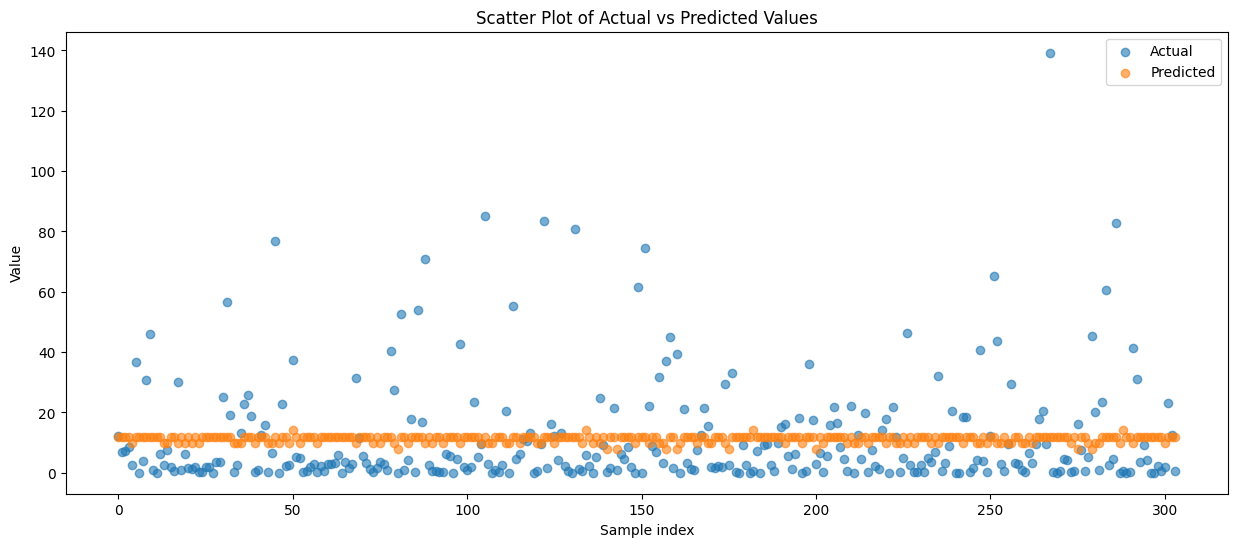

In [74]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.show()

MODEL CREATION - SVM

In [75]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
yd_pred = model1.predict(x_test)
print(yd_pred)

[3.89399846 4.20961002 4.23200355 4.3472141  4.22096146 4.30804471
 3.96273375 4.29403783 4.06661929 4.29753999 4.05612074 4.0291659
 3.96073617 4.01517392 3.946789   4.13454535 4.05262199 4.04912365
 4.01867121 3.87661007 4.36470194 4.04912365 4.31190292 4.21048027
 4.29053539 4.30454345 4.21311539 3.95027478 4.29753999 4.38817483
 4.03266503 4.31408641 4.03266503 4.04912365 3.91871301 4.30842527
 4.09992978 3.89399846 4.29403783 3.91871301 3.9767027  4.33158604
 4.31758703 4.28755378 3.93981952 4.25303312 4.02055996 4.16803348
 3.89051908 4.21048027 4.31154565 3.97320956 4.02055996 4.21311539
 4.12753527 3.96073617 4.10343361 3.88008602 4.2870327  4.38118595
 4.0740063  4.30104187 4.11394652 3.95027478 4.21662071 4.02216898
 4.1610223  4.17153916 4.03099686 3.89747866 4.14155607 4.0740063
 4.1505062  4.01517392 3.92219474 4.06350177 4.10343361 4.16803348
 3.92219474 4.04562572 4.01012762 4.29053539 4.11044199 4.21048027
 4.0631194  4.24952855 4.13454535 4.07750849 4.01708199 4.063119

METRICS EVALUATION

In [76]:
model1_test_mse = metrics.mean_squared_error(y_test, yd_pred)
model1_test_r2 = metrics.r2_score(y_test, yd_pred)
model1_results = pd.DataFrame(['Support Vector',model1_test_mse,model1_test_r2]).transpose()
model1_results.columns = ['Method','Test MSE', 'Test R2']
print(model1_results)

           Method   Test MSE   Test R2
0  Support Vector  386.40797 -0.163564


RESULTS VISUALIZATION

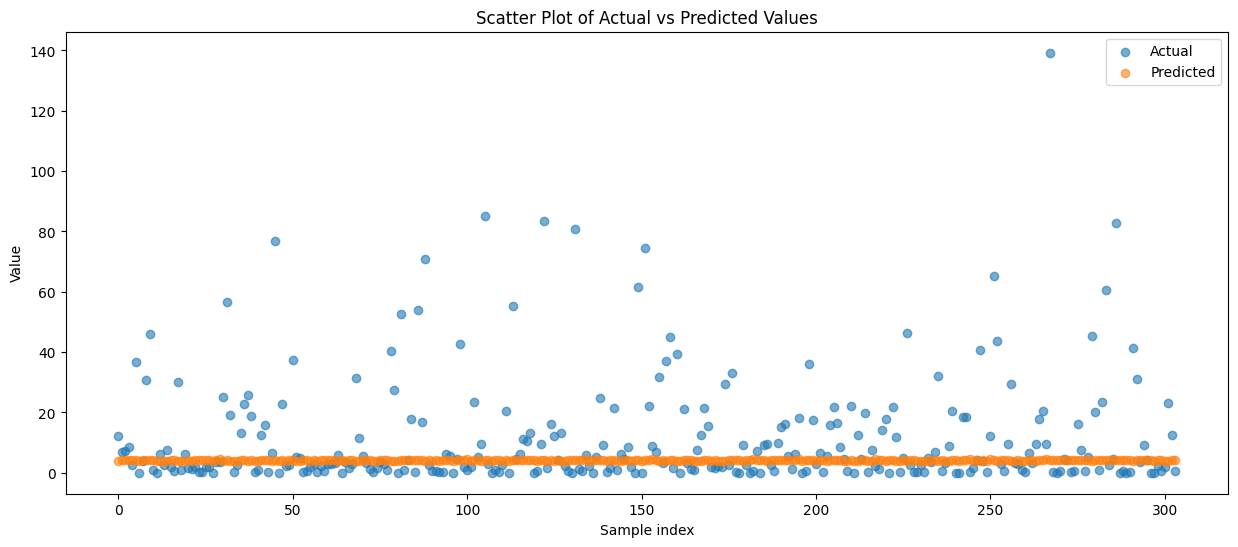

In [77]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), yd_pred, label='Predicted', alpha=0.6)
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.show()

MODEL CREATION - KNN

In [78]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
ya_pred = model2.predict(x_test)

METRICS EVALUATION

In [79]:
model2_test_mse = metrics.mean_squared_error(y_test, ya_pred)
model2_test_r2 = metrics.r2_score(y_test, ya_pred)
model2_results = pd.DataFrame(['KNN',model2_test_mse,model2_test_r2]).transpose()
model2_results.columns = ['Method','Test MSE', 'Test R2']
print(model2_results)

  Method    Test MSE   Test R2
0    KNN  443.193424 -0.334558


RESULTS VISUALIZATION

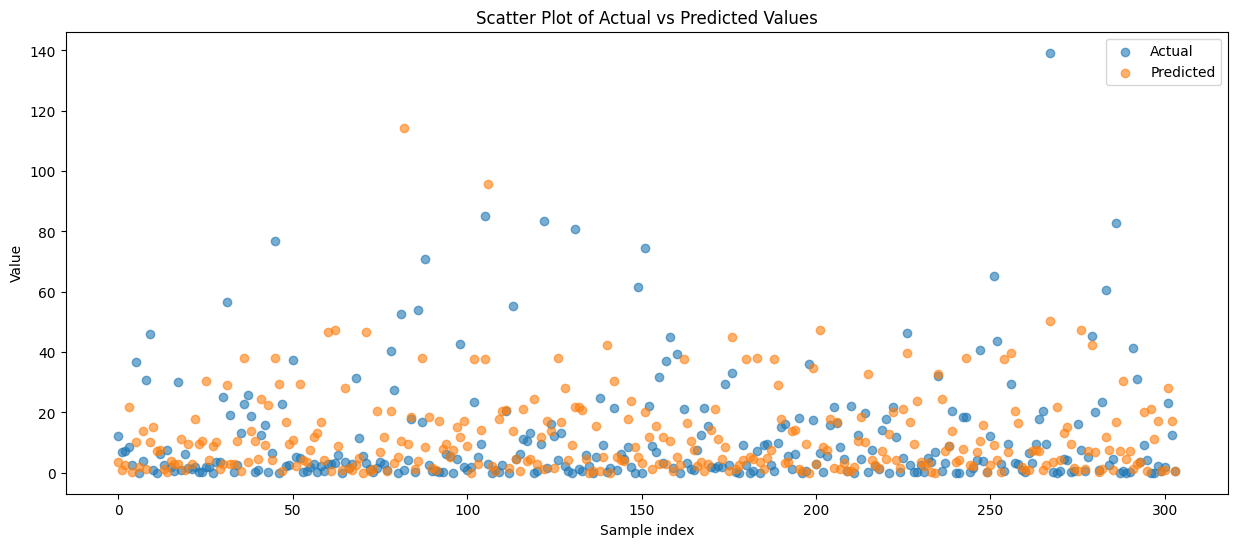

In [80]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), ya_pred, label='Predicted', alpha=0.6)
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.show()